# Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from glob import glob

import os
import cv2
import shutil
import itertools

import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras.models import Model, Sequential
from keras.layers import TimeDistributed, Dense, Flatten, Dropout, Bidirectional, LSTM, GRU
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras_preprocessing.image import ImageDataGenerator

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc

RANDOM_SEED = 42

# Classification Results

In [ ]:
def load_data(dir_path, img_size=(224,224)):
    """
    Load resized images as np.arrays to workspace
    """
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels

train_dir = '/content/drive/My Drive/Dataset_200/dataset/train/'
test_dir = '/content/drive/My Drive/Dataset_200/dataset/test/'
validation_dir = '/content/drive/My Drive/Dataset_200/dataset/validation/'

IMG_SIZE = (224,224)

X_train, y_train, labels = load_data(train_dir, IMG_SIZE)
X_test, y_test, _ = load_data(test_dir, IMG_SIZE)
X_val, y_val, _ = load_data(validation_dir, IMG_SIZE)

X_train = np.array([cv2.resize(image, (224, 224)) for image in X_train])
X_test = np.array([cv2.resize(image, (224, 224)) for image in X_test])
X_val = np.array([cv2.resize(image, (224, 224)) for image in X_val])

100%|██████████| 2/2 [00:43<00:00, 21.56s/it]


1536 images loaded from /content/drive/My Drive/Dataset_200/dataset/train/ directory.


100%|██████████| 2/2 [00:10<00:00,  5.37s/it]


480 images loaded from /content/drive/My Drive/Dataset_200/dataset/test/ directory.


100%|██████████| 2/2 [00:08<00:00,  4.43s/it]


384 images loaded from /content/drive/My Drive/Dataset_200/dataset/validation/ directory.


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/models/Defense/custom5layer.h5')

Train: 0.9772, Test: 0.9667
Test Accuracy = 0.9667
Precision: 0.962810
Recall: 0.970833
F1 score: 0.966805
Cohens kappa: 0.933333
ROC AUC: 0.966667
[[231   9]
 [  7 233]]
True positive: 233 , True negative: 231 , False positive: 9 , False negative: 7
Sensitivity: 0.9708
Specificity: 0.9625


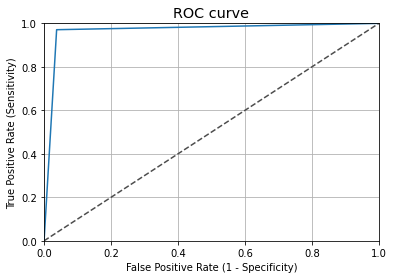

In [ ]:
# test
predictions = model.predict(X_test)
predictions = [1 if x>0.5 else 0 for x in predictions]

_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)

print('Train: %.4f, Test: %.4f' % (train_acc, test_acc))

accuracy = accuracy_score(y_test, predictions)
print('Test Accuracy = %.4f' % accuracy)

# precision: tp / (tp + fp)
precision = precision_score(y_test, predictions)
print('Precision: %f' % precision)

  # recall: tp / (tp + fn)
recall = recall_score(y_test, predictions)
print('Recall: %f' % recall)

  # f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions)
print('F1 score: %f' % f1)

#KAPPA SCORE
kappa = cohen_kappa_score(y_test, predictions)
print('Cohens kappa: %f' % kappa)

  # ROC AUC
auc = roc_auc_score(y_test, predictions)
print('ROC AUC: %f' % auc)
 
# confusion matrix
matrix = confusion_matrix(y_test, predictions)
print(matrix)

tn, fp, fn, tp = matrix.ravel()
print("True positive:", tp, ", True negative:", tn,
            ", False positive:", fp, ", False negative:", fn)

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity: {:.4f}".format(sensitivity))
print("Specificity: {:.4f}".format(specificity))

fpr, tpr, thresholds = roc_curve(y_test, predictions)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
# #tmp
# tp = 237
# tn = 191
# fp = 49
# fn = 3
# sensitivity = tp / (tp + fn)
# specificity = tn / (tn + fp)

# print("Sensitivity: {:.4f}".format(sensitivity))
# print("Specificity: {:.4f}".format(specificity))
len(X_test)

480

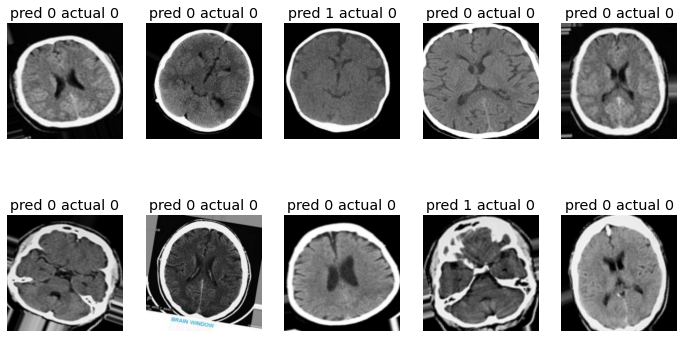

In [ ]:
from secrets import randbelow
# print(randbelow(10))

predicted = model.predict(X_test)
predicted = [1 if x>0.5 else 0 for x in predicted]

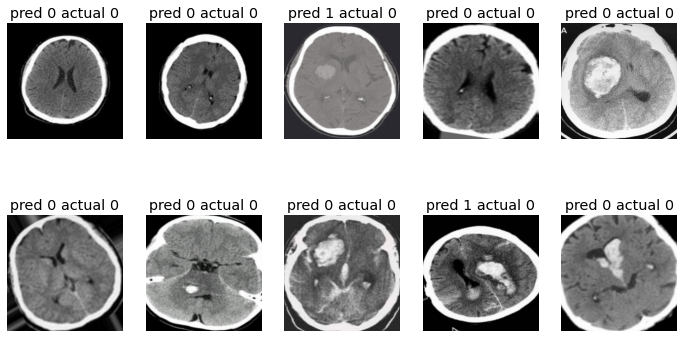

In [ ]:
rows = 3
col = 5
j = 0
fig = plt.figure(figsize=(12, 10))

for i in range(10):
    
    # if predicted[i] != y_test[i]:
        j = j + 1
        fig.add_subplot(rows, col, j)
        plt.imshow(X_test[randbelow(len(X_test))])
        plt.axis('off')
        plt.title("pred "+str(predicted[i])+" actual "+str(y_test[i]))

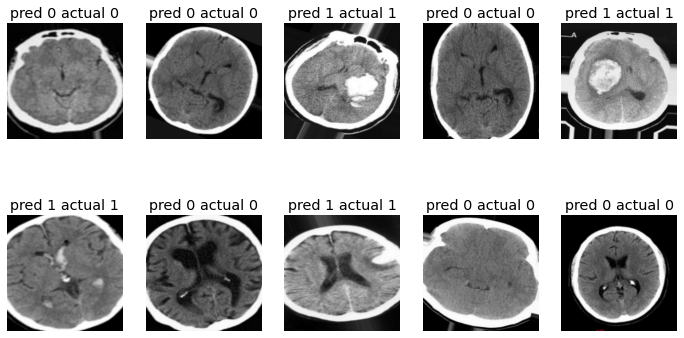

In [ ]:
from random import randint

rows = 3
col = 5
j = 0
fig = plt.figure(figsize=(12, 10))

for i in range(10):
    
    # if predicted[i] != y_test[i]:
        j = j + 1
        fig.add_subplot(rows, col, j)
        tmp = randint(0, len(X_test))
        plt.imshow(X_test[tmp])
        plt.axis('off')
        plt.title("pred "+str(predicted[tmp])+" actual "+str(y_test[tmp]))

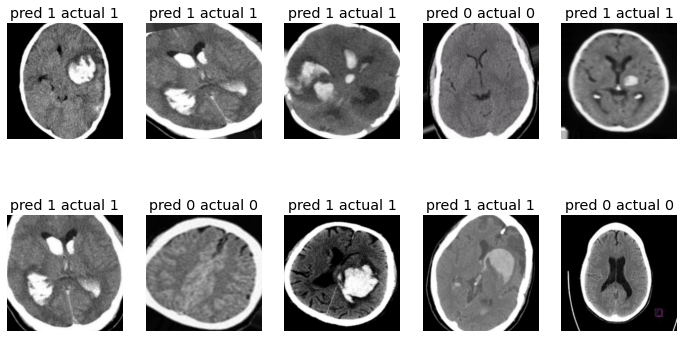

In [ ]:
from random import randint

rows = 3
col = 5
j = 0
fig = plt.figure(figsize=(12, 10))

for i in range(10):
    
    # if predicted[i] != y_test[i]:
        j = j + 1
        fig.add_subplot(rows, col, j)
        # tmp = randint(0, len(X_test))
        tmp = randint(200, 320)
        plt.imshow(X_test[tmp])
        plt.axis('off')
        plt.title("pred "+str(predicted[tmp])+" actual "+str(y_test[tmp]))

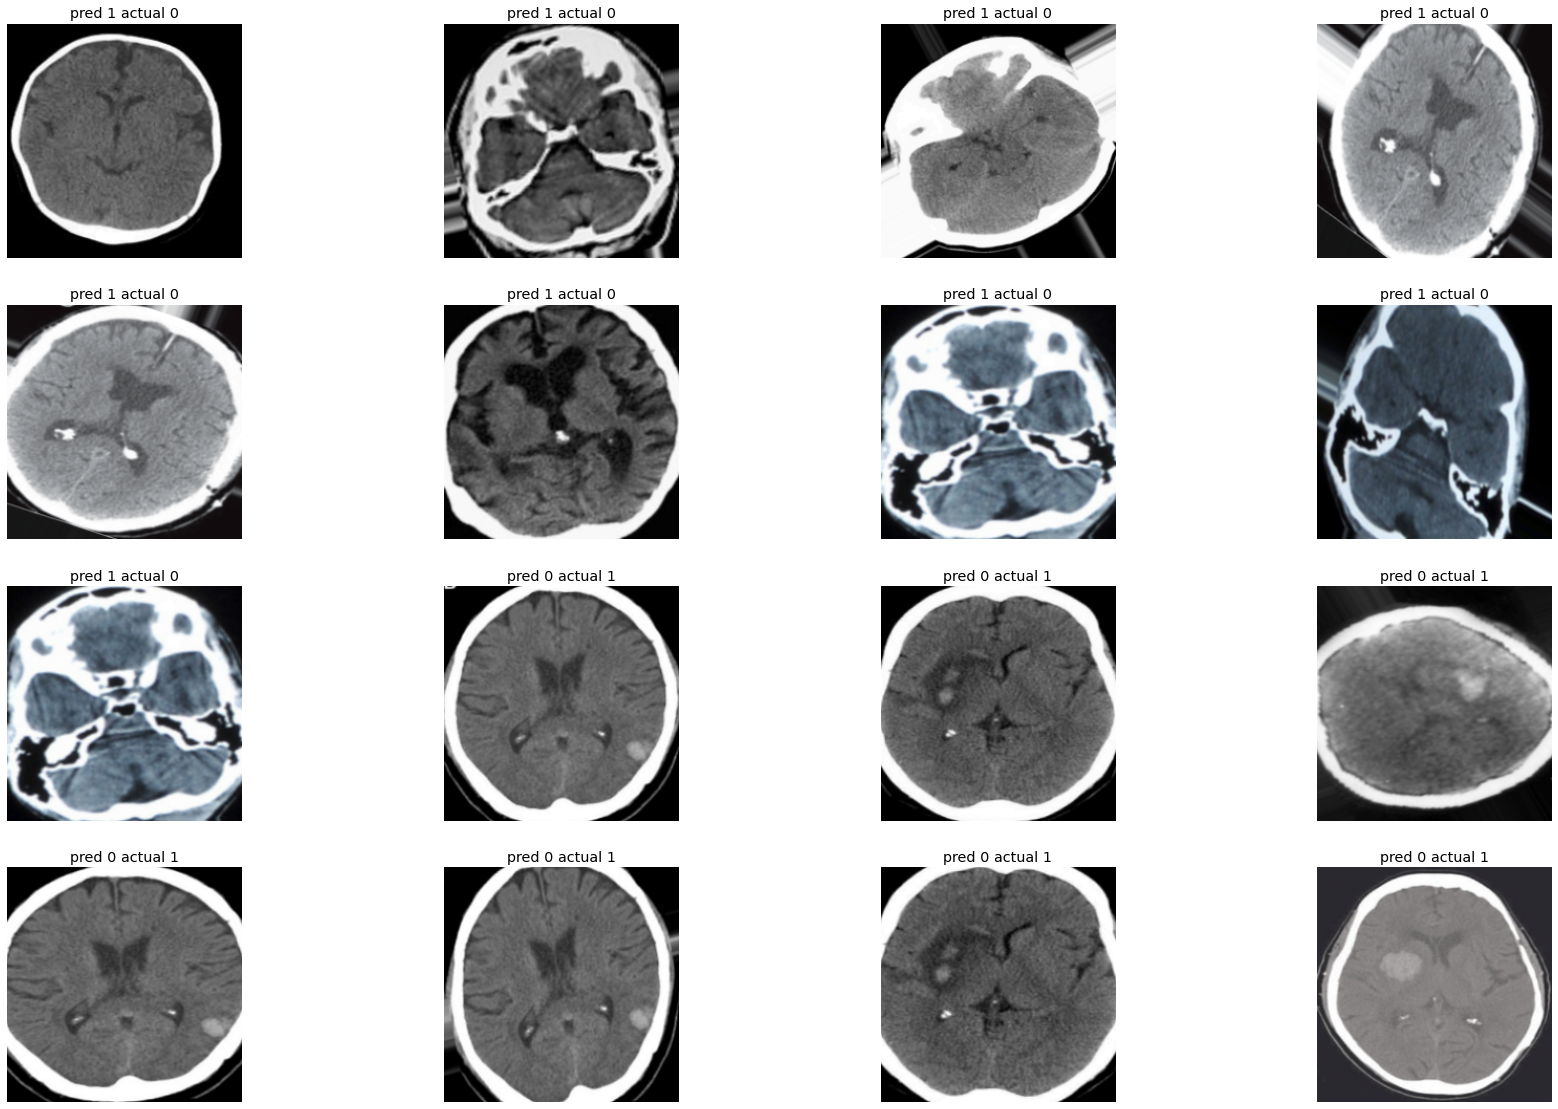

In [ ]:
predicted = model.predict(X_test)
predicted = [1 if x>0.5 else 0 for x in predicted]
#print_images=True
#if print_images:
rows = 5
col = 4
j = 0
fig = plt.figure(figsize=(30, 25))

for i in range(len(predicted)):
    if predicted[i] != y_test[i]:
        j = j + 1
        fig.add_subplot(rows, col, j)
        plt.imshow(X_test[i])
        plt.axis('off')
        plt.title("pred "+str(predicted[i])+" actual "+str(y_test[i]))

# ROC Curve Analysis

In [ ]:
from tensorflow.keras.models import load_model

# model = load_model('/content/drive/MyDrive/models/Defense/custom5layer.h5')
model_best = load_model('/content/drive/MyDrive/models/Defense/custom5layer.h5')
model_cnn3 = load_model('/content/drive/MyDrive/models/Defense/custom4layer.h5')
model_cnn4 = load_model('/content/drive/MyDrive/models/Defense/custom6layer_128.h5')
model_vgg16 = load_model('/content/drive/MyDrive/models/Defense/vgg16.h5')
model_vgg19 = load_model('/content/drive/MyDrive/models/Defense/vgg19.h5')
model_resnet50 = load_model('/content/drive/MyDrive/models/Defense/resnet50.h5')
model_resnet152 = load_model('/content/drive/MyDrive/models/Defense/resnet152.h5')
model_inception = load_model('/content/drive/MyDrive/models/Defense/InceptionV3.h5')

In [ ]:
p0 = model_best.predict(X_test)
p0 = [1 if x>0.5 else 0 for x in p0]
fpr0, tpr0, thresholds0 = roc_curve(y_test, p0)

In [ ]:
p1 = model_cnn3.predict(X_test)
p1 = [1 if x>0.5 else 0 for x in p1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, p1)

In [ ]:
p2 = model_cnn4.predict(X_test)
p2 = [1 if x>0.5 else 0 for x in p2]
fpr2, tpr2, thresholds1 = roc_curve(y_test, p2)

In [ ]:
p3 = model_vgg16.predict(X_test)
p3 = [1 if x>0.5 else 0 for x in p3]
fpr3, tpr3, thresholds3 = roc_curve(y_test, p3)

In [ ]:
p4 = model_vgg19.predict(X_test)
p4 = [1 if x>0.5 else 0 for x in p4]
fpr4, tpr4, thresholds4 = roc_curve(y_test, p4)

In [ ]:
p5 = model_resnet50.predict(X_test / 255)
p5 = [1 if x>0.5 else 0 for x in p5]
fpr5, tpr5, thresholds5 = roc_curve(y_test, p5)

In [ ]:
p6 = model_resnet152.predict(X_test / 255)
p6 = [1 if x>0.5 else 0 for x in p6]
fpr6, tpr6, thresholds6 = roc_curve(y_test, p6)

In [ ]:
p7 = model_inception.predict(X_test / 255)
p7 = [1 if x>0.5 else 0 for x in p7]
fpr7, tpr7, thresholds7 = roc_curve(y_test, p7)

In [ ]:
# p0 = model_best.predict(X_test)
# p0 = [1 if x>0.5 else 0 for x in p0]
# fpr0, tpr0, thresholds0 = roc_curve(y_test, p0)

# p1 = model_cnn3.predict(X_test)
# p1 = [1 if x>0.5 else 0 for x in p1]
# fpr1, tpr1, thresholds1 = roc_curve(y_test, p1)

# p2 = model_cnn4.predict(X_test)
# p2 = [1 if x>0.5 else 0 for x in p2]
# fpr2, tpr2, thresholds1 = roc_curve(y_test, p2)

# p3 = model_vgg16.predict(X_test)
# p3 = [1 if x>0.5 else 0 for x in p3]
# fpr3, tpr3, thresholds3 = roc_curve(y_test, p3)

# p4 = model_vgg19.predict(X_test)
# p4 = [1 if x>0.5 else 0 for x in p4]
# fpr4, tpr4, thresholds4 = roc_curve(y_test, p4)

# p5 = model_resnet50.predict(X_test)
# p5 = [1 if x>0.5 else 0 for x in p5]
# fpr5, tpr5, thresholds5 = roc_curve(y_test, p5)

# p6 = model_resnet152.predict(X_test)
# p6 = [1 if x>0.5 else 0 for x in p6]
# fpr6, tpr6, thresholds6 = roc_curve(y_test, p6)

# p7 = model_inception.predict(X_test)
# p7 = [1 if x>0.5 else 0 for x in p7]
# fpr7, tpr7, thresholds7 = roc_curve(y_test, p7)

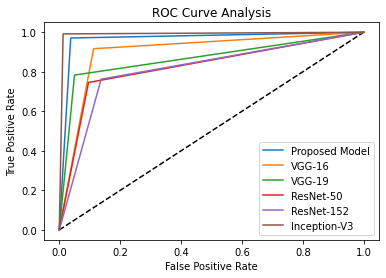

In [ ]:
# plt.figsize()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr0, tpr0, label='Proposed Model' % auc(fpr0, tpr0))
# plt.plot(fpr1, tpr1, label='CNN-3' % auc(fpr1, tpr1))
# plt.plot(fpr2, tpr2, label='CNN-4' % auc(fpr2, tpr2))
plt.plot(fpr3, tpr3, label='VGG-16' % auc(fpr3, tpr3))
plt.plot(fpr4, tpr4, label='VGG-19' % auc(fpr4, tpr4))
plt.plot(fpr5, tpr5, label='ResNet-50' % auc(fpr5, tpr5))
plt.plot(fpr6, tpr6, label='ResNet-152' % auc(fpr6, tpr6))
plt.plot(fpr7, tpr7, label='Inception-V3' % auc(fpr7, tpr7))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Analysis')
plt.legend(loc='best')
plt.show()